In [1]:
import pandas as pd
from scipy.stats import skew, kurtosis

# Load your dataset
# Replace 'your_dataset.xlsx' with the path to your dataset file
# Try different engines such as 'openpyxl', 'xlrd', etc.
# until you find the correct one
df = pd.read_excel(r"C:\Users\Vamshi Krishna\Downloads\Rescaled sectoral volatility.xlsx", engine='openpyxl')

# Check for any missing values
missing_values = df.isnull().sum()
print("Missing Values:")
print(missing_values)

# Calculate basic statistics

# Calculate mean
mean_values = df.mean()

# Calculate median
median_values = df.median()

# Calculate standard deviation
std_values = df.std()

# Exclude datetime columns before calculating skewness
numeric_columns = df.select_dtypes(include=['number']).columns
skewness_values = df[numeric_columns].apply(skew)

# Calculate kurtosis
kurtosis_values = df[numeric_columns].apply(kurtosis)

# Create a DataFrame to store the results
descriptive_stats = pd.DataFrame({
    'Mean': mean_values,
    'Median': median_values,
    'Standard Deviation': std_values,
    'Skewness': skewness_values,
    'Kurtosis': kurtosis_values
})

print("\nDescriptive Statistics:")
print(descriptive_stats)

Missing Values:
Date           0
Auto           0
CNXcons        0
CNXenergy      0
NiftFinServ    0
NiftyFMCG      0
CNXInfra       0
Metal          0
PSE            0
PSU            0
Reality        0
Service        0
dtype: int64

Descriptive Statistics:
                   Mean      Median            Standard Deviation  Skewness  \
Auto          86.142660   85.488750                     27.307862 -0.034942   
CNXInfra      33.579592   31.619750                       9.30823  1.003462   
CNXcons       44.636519   44.633501                     17.294684  0.428203   
CNXenergy    137.351648  128.522749                     60.422867  0.849292   
Date                NaN         NaN  1224 days 13:18:52.701571120       NaN   
Metal         33.294723   28.863500                     13.572733  1.067489   
NiftFinServ  103.835408   99.574751                     47.798916  0.442575   
NiftyFMCG    265.272981  258.992754                     96.394054  0.580173   
PSE           34.138560   34.53

C:\Users\Vamshi Krishna\AppData\Local\Temp\ipykernel_19932\1500780943.py:18: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  mean_values = df.mean()
C:\Users\Vamshi Krishna\AppData\Local\Temp\ipykernel_19932\1500780943.py:21: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  median_values = df.median()


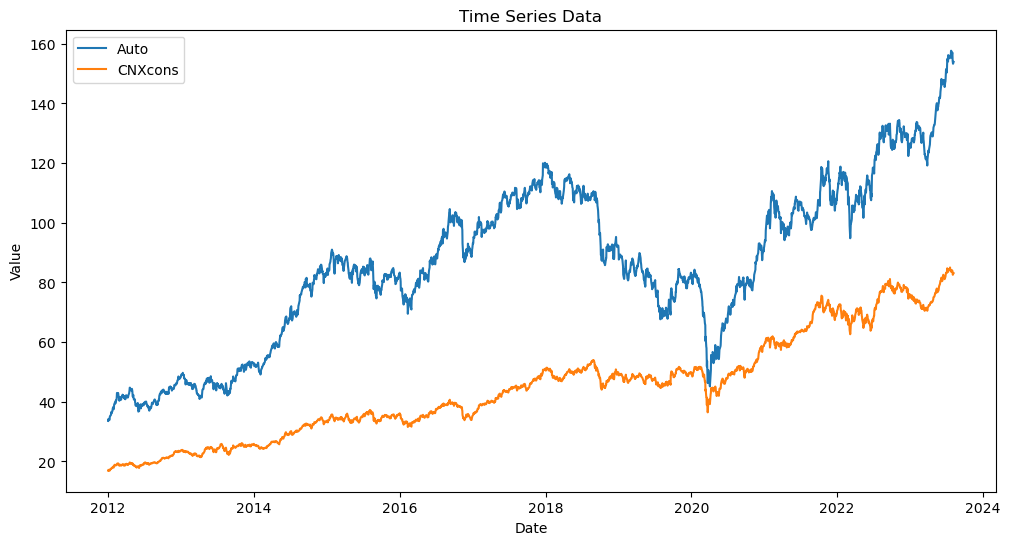

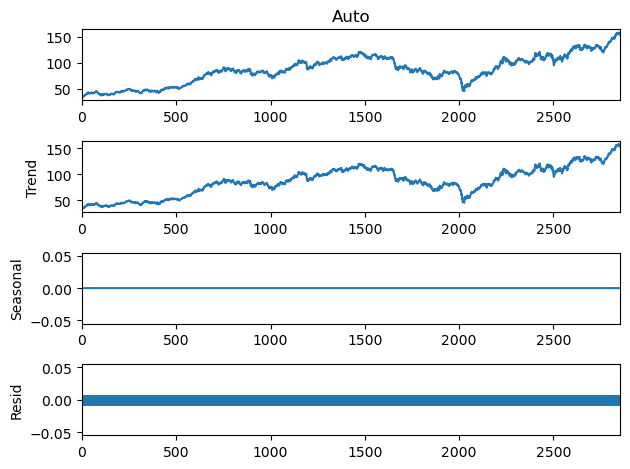

<Figure size 1200x800 with 0 Axes>

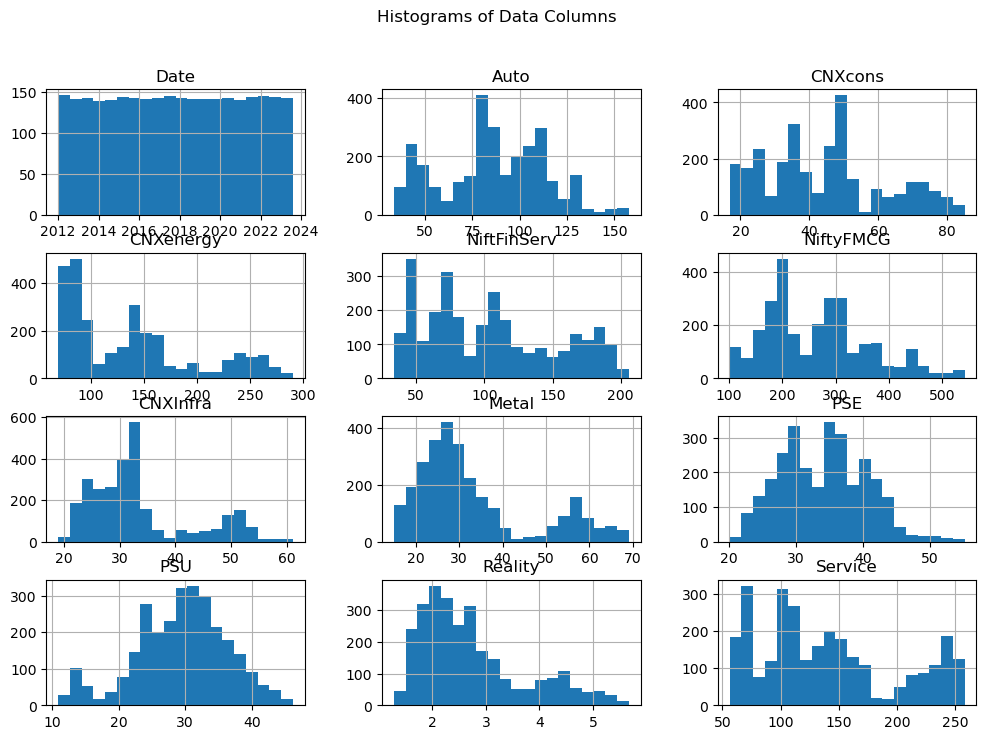

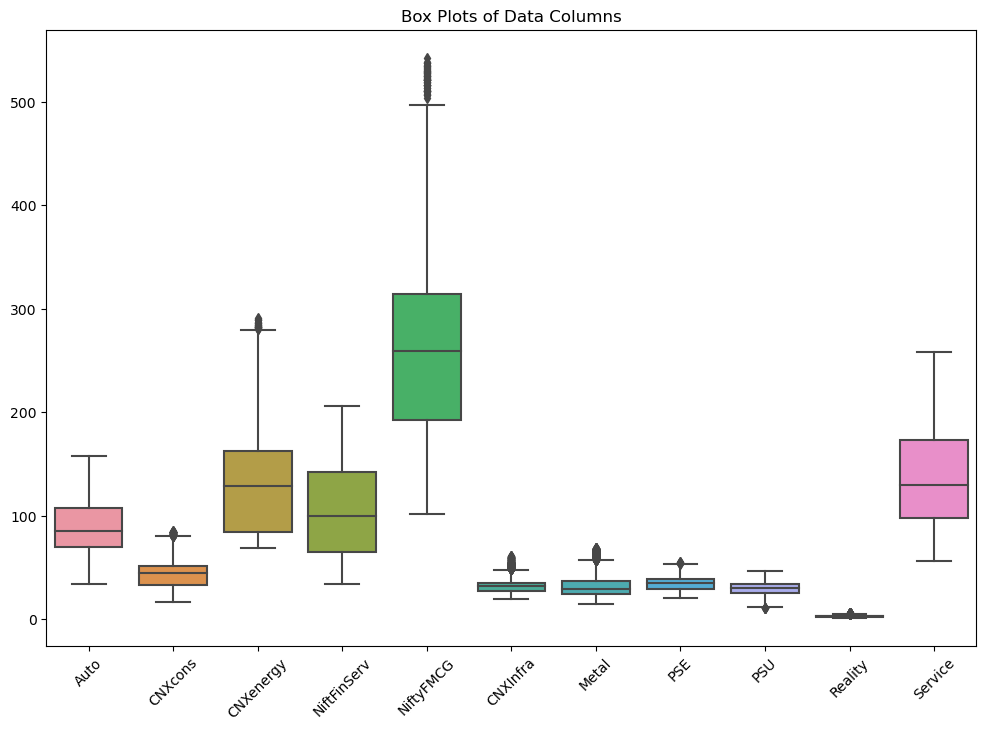

<Figure size 1000x800 with 0 Axes>

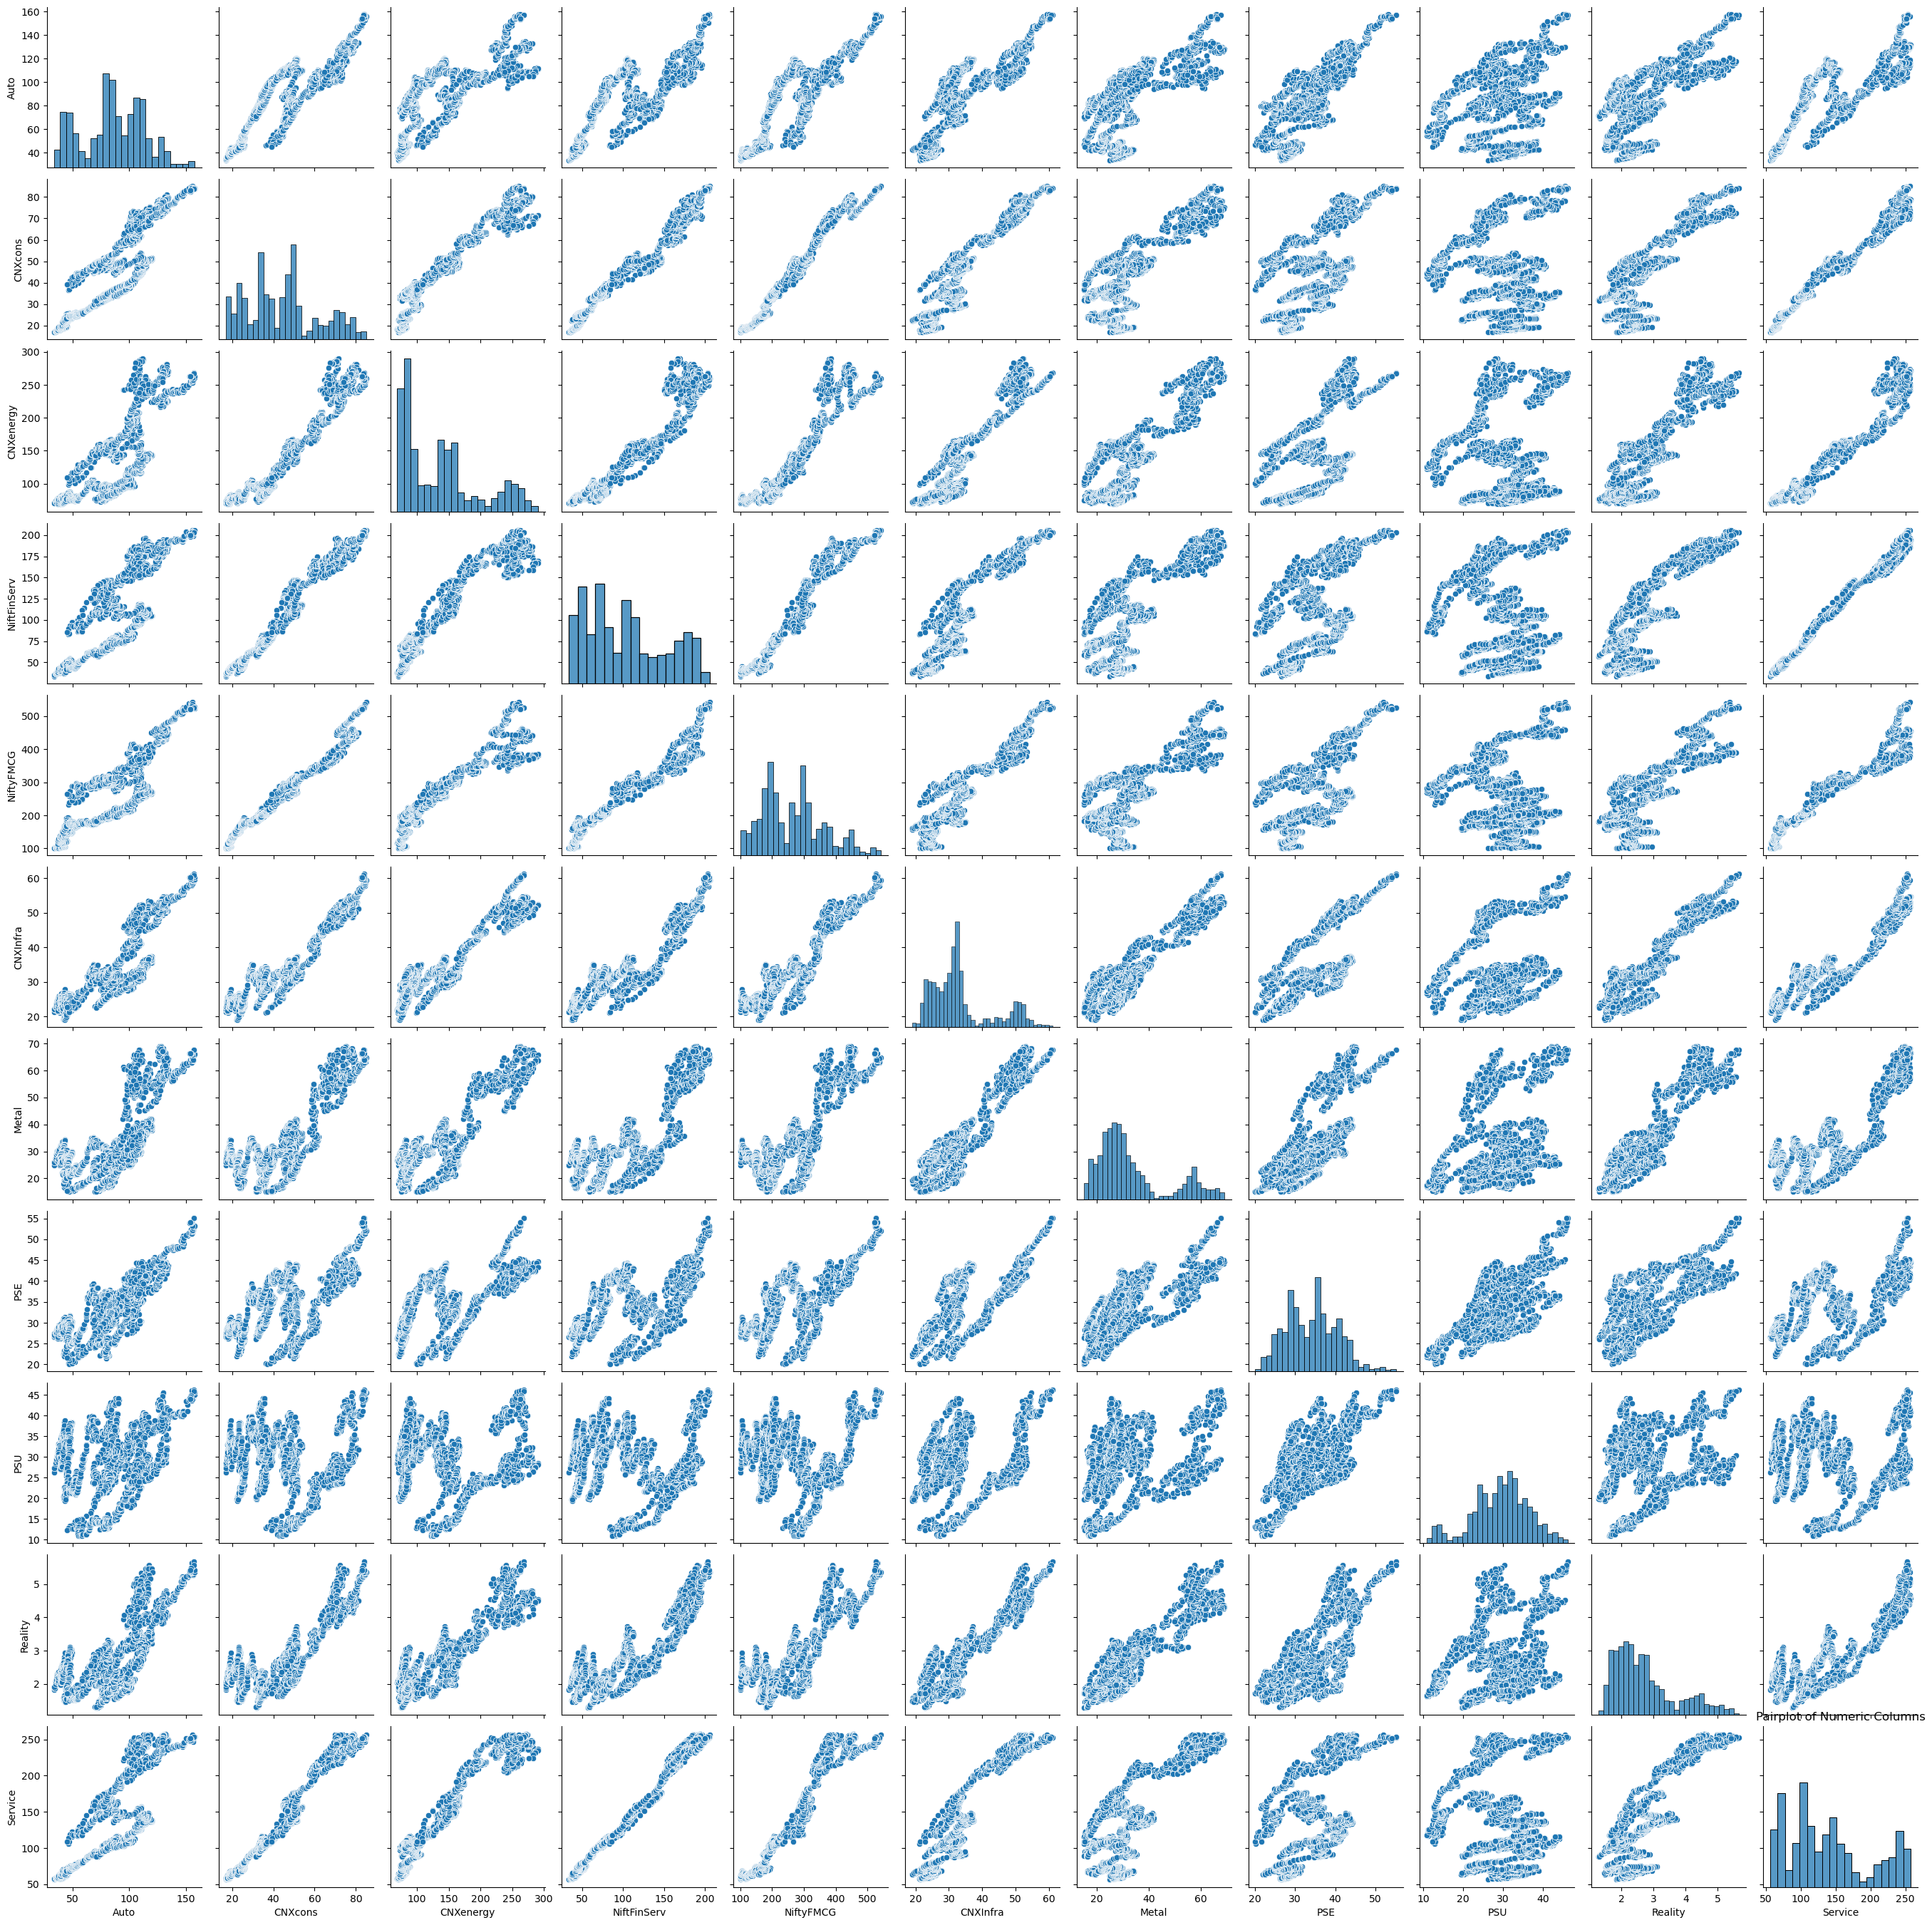

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

# Time Series Plot
plt.figure(figsize=(12, 6))
plt.plot(df['Date'], df['Auto'], label='Auto')
plt.plot(df['Date'], df['CNXcons'], label='CNXcons')
# Add more lines for other columns if needed
plt.xlabel('Date')
plt.ylabel('Value')
plt.title('Time Series Data')
plt.legend()
plt.show()

# Seasonal Decomposition Plot (assuming 'Date' is datetime and 'Auto' is the target column)
from statsmodels.tsa.seasonal import seasonal_decompose

result = seasonal_decompose(df['Auto'], model='additive', period=1)  # Adjust 'period' if seasonality is not daily
result.plot()
plt.show()

# Histograms
plt.figure(figsize=(12, 8))
df.hist(figsize=(12, 8), bins=20)
plt.suptitle('Histograms of Data Columns')
plt.show()

# Box Plots
plt.figure(figsize=(12, 8))
sns.boxplot(data=df)
plt.title('Box Plots of Data Columns')
plt.xticks(rotation=45)
plt.show()

# Scatter Plots
plt.figure(figsize=(10, 8))
sns.pairplot(df)
plt.title('Pairplot of Numeric Columns')
plt.show()

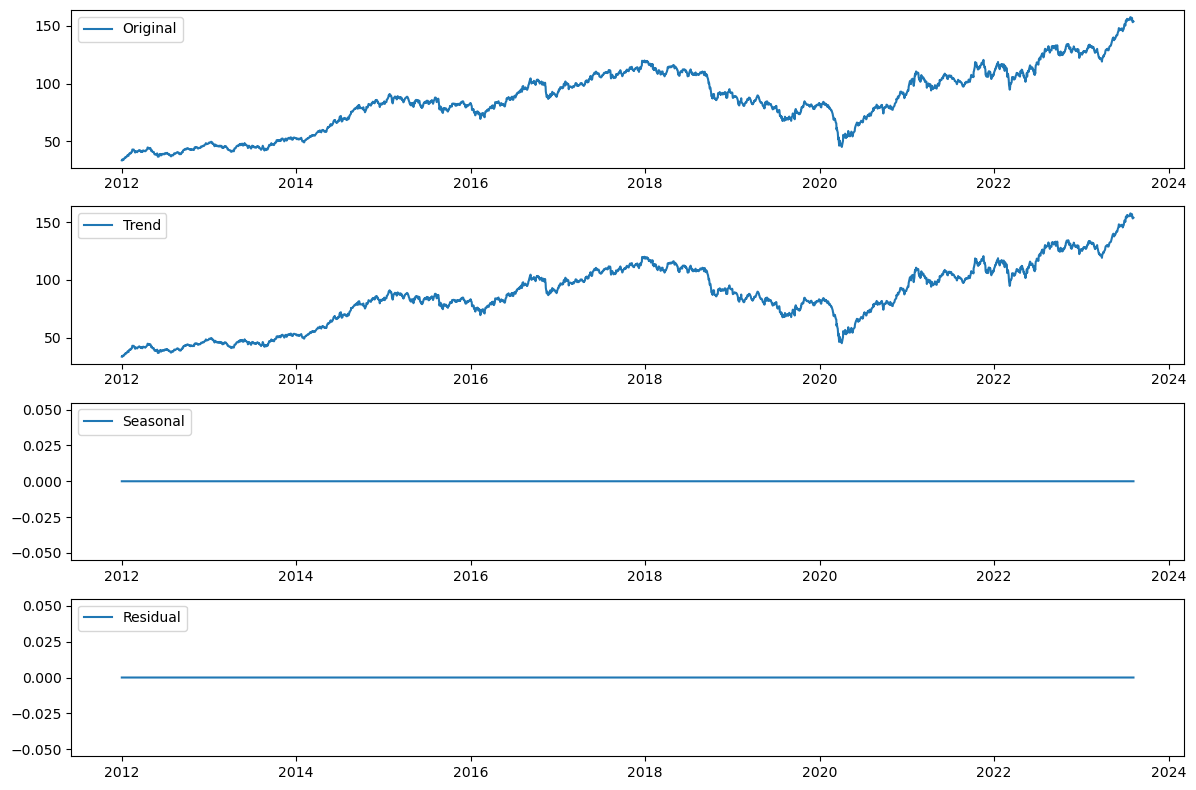

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose

# Load your dataset
# Replace 'your_dataset.xlsx' with the path to your dataset file
# Try different engines such as 'openpyxl', 'xlrd', etc.
# until you find the correct one
df = pd.read_excel(r"C:\Users\Vamshi Krishna\Downloads\Rescaled sectoral volatility.xlsx", engine='openpyxl')

# Set 'Date' column as the index (assuming it contains datetime values)
df.set_index('Date', inplace=True)

# Perform seasonal decomposition using STL
decomposition = seasonal_decompose(df['Auto'], model='additive', period=1)  # Adjust 'period' if needed

# Plot the decomposition
plt.figure(figsize=(12, 8))
plt.subplot(411)
plt.plot(df.index, df['Auto'], label='Original')
plt.legend(loc='upper left')
plt.subplot(412)
plt.plot(df.index, decomposition.trend, label='Trend')
plt.legend(loc='upper left')
plt.subplot(413)
plt.plot(df.index, decomposition.seasonal, label='Seasonal')
plt.legend(loc='upper left')
plt.subplot(414)
plt.plot(df.index, decomposition.resid, label='Residual')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()


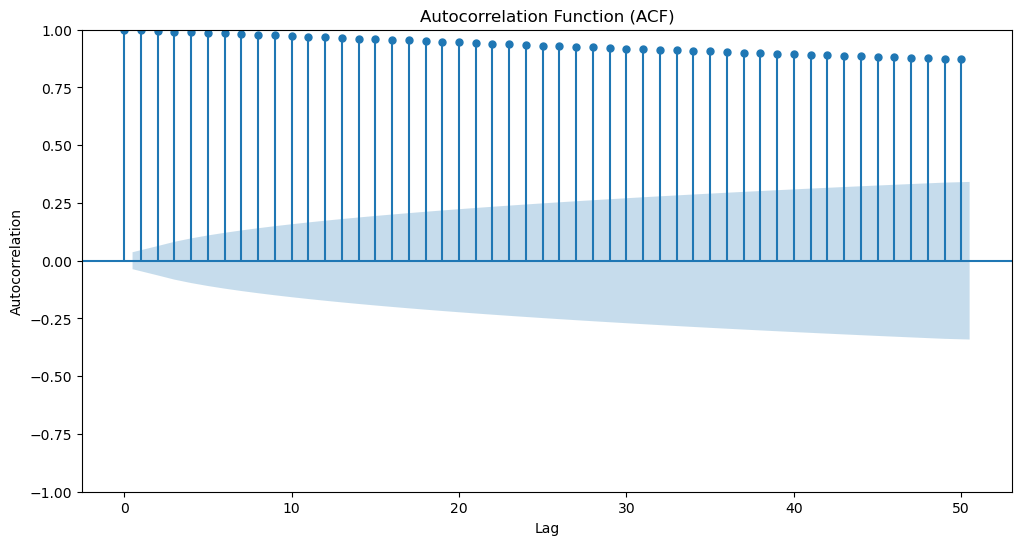

C:\ProgramData\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


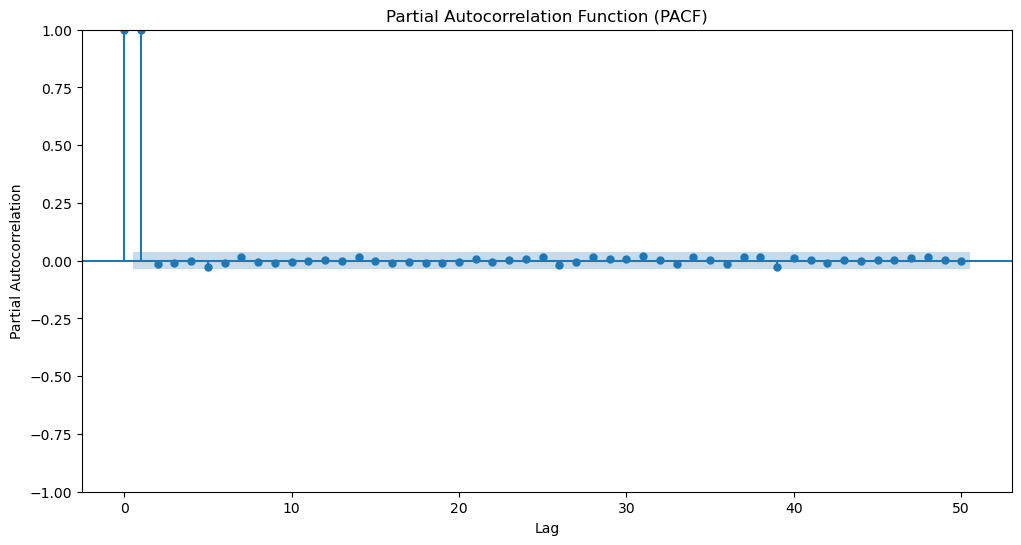

In [4]:
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Compute autocorrelation function (ACF)
plt.figure(figsize=(12, 6))
plot_acf(df['Auto'], lags=50, ax=plt.gca())
plt.title('Autocorrelation Function (ACF)')
plt.xlabel('Lag')
plt.ylabel('Autocorrelation')
plt.show()

# Compute partial autocorrelation function (PACF)
plt.figure(figsize=(12, 6))
plot_pacf(df['Auto'], lags=50, ax=plt.gca())
plt.title('Partial Autocorrelation Function (PACF)')
plt.xlabel('Lag')
plt.ylabel('Partial Autocorrelation')
plt.show()


In [7]:
pip install arch

Defaulting to user installation because normal site-packages is not writeable
     ------------------------------------ 924.3/924.3 kB 182.3 kB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [1]:
import pandas as pd
from arch import arch_model

# Load your dataset
# Replace 'your_dataset.xlsx' with the path to your dataset file
# Try different engines such as 'openpyxl', 'xlrd', etc.
# until you find the correct one
df = pd.read_excel(r"C:\Users\Vamshi Krishna\Downloads\Rescaled sectoral volatility.xlsx", engine='openpyxl')

# Select the target variable (assuming 'Auto' is the target variable)
returns = df['Auto'].pct_change().dropna()  # Compute returns

# Fit GARCH(1,1) model using MLE
garch_model = arch_model(returns, vol='GARCH', p=1, q=1)
garch_result_mle = garch_model.fit(disp='off')  # Use 'disp' parameter to suppress convergence output

# Print MLE model summary
print("MLE Model Summary:")
print(garch_result_mle.summary())

# Fit GARCH(1,1) model using Bayesian estimation
garch_result_bayes = garch_model.fit(method='bayes', disp='off')  # Bayesian estimation

# Print Bayesian model summary
print("\nBayesian Model Summary:")
print(garch_result_bayes.summary())


C:\Users\Vamshi Krishna\AppData\Roaming\Python\Python310\site-packages\arch\univariate\base.py:311: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0001857. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(


MLE Model Summary:
                     Constant Mean - GARCH Model Results                      
Dep. Variable:                   Auto   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:                8489.67
Distribution:                  Normal   AIC:                          -16971.3
Method:            Maximum Likelihood   BIC:                          -16947.5
                                        No. Observations:                 2853
Date:                Sat, Mar 16 2024   Df Residuals:                     2852
Time:                        22:05:50   Df Model:                            1
                                 Mean Model                                 
                 coef    std err          t      P>|t|      95.0% Conf. Int.
----------------------------------------------------------------------------
mu         8.7714e-04  2.389e-05     36

TypeError: ARCHModel.fit() got an unexpected keyword argument 'method'

In [8]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV, TimeSeriesSplit
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

# Step 1: Load the Dataset
df = pd.read_excel(r"C:\Users\Vamshi Krishna\Downloads\Rescaled sectoral volatility.xlsx")

# Step 2: Preprocess the Data (if required)
# Handle missing values and any other preprocessing steps

# Step 3: Feature Engineering
# Create lag features
lag_periods = [1, 2, 3, 4, 5]  # You can adjust the lag periods as needed
for period in lag_periods:
    df[f'Auto_Lag_{period}'] = df['Auto'].shift(periods=period)

# Drop rows with NaN resulting from the lag operation
df.dropna(inplace=True)

# Step 4: Split the Data (Time Series Split)
X = df.drop(columns=['Date', 'Auto'])  # Features
y = df['Auto']  # Target variable

tscv = TimeSeriesSplit(n_splits=5)  # Time Series Cross Validation

# Step 5: Model Training and Hyperparameter Tuning
models = {
    'SVR': SVR(),
    'RandomForest': RandomForestRegressor(),
    'GradientBoosting': GradientBoostingRegressor()
}

for name, model in models.items():
    pipeline = Pipeline([('scaler', StandardScaler()), (name, model)])
    
    # Define hyperparameters to tune
    param_grid = {}
    if name == 'SVR':
        param_grid = {'SVR__C': [0.1, 1, 10], 'SVR__gamma': [0.1, 1, 10]}
    elif name == 'RandomForest':
        param_grid = {'RandomForest__n_estimators': [50, 100, 200], 'RandomForest__max_depth': [None, 5, 10]}
    elif name == 'GradientBoosting':
        param_grid = {'GradientBoosting__n_estimators': [50, 100, 200], 'GradientBoosting__max_depth': [3, 5, 7]}
    
    # Grid Search with Time Series Cross Validation
    grid_search = GridSearchCV(pipeline, param_grid, cv=tscv, scoring='neg_mean_squared_error')
    grid_search.fit(X, y)
    
    # Best model
    best_model = grid_search.best_estimator_
    
    # Step 6: Model Evaluation
    y_pred = best_model.predict(X)
    mse = mean_squared_error(y, y_pred)
    rmse = mean_squared_error(y, y_pred, squared=False)
    mae = mean_absolute_error(y, y_pred)
    
    # Step 7: Compare Model Performance
    print(f'{name}:')
    print(f'MSE: {mse}')
    print(f'RMSE: {rmse}')
    print(f'MAE: {mae}')


SVR:
MSE: 0.9570081384126605
RMSE: 0.9782679277236173
MAE: 0.7137022398090235
RandomForest:
MSE: 1.2671833952205407
RMSE: 1.125692407019138
MAE: 0.8259158061703857
GradientBoosting:
MSE: 0.6440641648079801
RMSE: 0.8025360831812985
MAE: 0.5936999502498903


In [2]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

# Step 1: Load the Dataset
df = pd.read_excel(r"C:\Users\Vamshi Krishna\Downloads\Rescaled sectoral volatility.xlsx")

# Step 2: Preprocess the Data (if required)
# Handle missing values and any other preprocessing steps

# Step 3: Feature Engineering
# Create lag features
lag_periods = [1, 2, 3, 4, 5]  
for period in lag_periods:
    df[f'Auto_Lag_{period}'] = df['Auto'].shift(periods=period)

# Drop rows with NaN resulting from the lag operation
df.dropna(inplace=True)

# Step 4: Normalize Data
# Exclude datetime column from scaling
numeric_columns = df.select_dtypes(include=['number']).columns
X_numeric = df[numeric_columns]

# Scale the numerical features using MinMaxScaler
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X_numeric)

# Step 5: Prepare Sequential Data
n_steps = 10  # Define the number of time steps
X = []
y = []
for i in range(len(X_scaled) - n_steps):
    X.append(X_scaled[i:i+n_steps, :-1])
    y.append(X_scaled[i+n_steps, -1])
X, y = np.array(X), np.array(y)

# Step 6: Split Data into Training and Testing Sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

# Step 7: Build LSTM Model
model = Sequential()
model.add(LSTM(units=50, activation='relu', input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dense(units=1))
model.compile(optimizer='adam', loss='mse')

# Step 8: Train the Model
model.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.1)

# Step 9: Evaluate the Model
mse = model.evaluate(X_test, y_test)
print("Mean Squared Error:", mse)

# Step 10: Make Predictions
predictions = model.predict(X_test)

# Print the future predictions
print("Future Predictions:")
for pred in predictions:
    print(pred)

Epoch 1/100
64/64 [==============================] - 1s 7ms/step - loss: 0.0130 - val_loss: 0.0023
Epoch 2/100
64/64 [==============================] - 0s 4ms/step - loss: 2.6553e-04 - val_loss: 0.0026
Epoch 3/100
64/64 [==============================] - 0s 4ms/step - loss: 1.2080e-04 - val_loss: 0.0019
Epoch 4/100
64/64 [==============================] - 0s 4ms/step - loss: 1.0002e-04 - val_loss: 0.0016
Epoch 5/100
64/64 [==============================] - 0s 4ms/step - loss: 8.1111e-05 - val_loss: 0.0016
Epoch 6/100
64/64 [==============================] - 0s 4ms/step - loss: 8.0601e-05 - val_loss: 0.0013
Epoch 7/100
64/64 [==============================] - 0s 4ms/step - loss: 7.1613e-05 - val_loss: 0.0012
Epoch 8/100
64/64 [==============================] - 0s 4ms/step - loss: 6.1023e-05 - val_loss: 8.5112e-04
Epoch 9/100
64/64 [==============================] - 0s 5ms/step - loss: 6.3405e-05 - val_loss: 6.6234e-04
Epoch 10/100
64/64 [==============================] - 0s 5ms/step - l

64/64 [==============================] - 0s 4ms/step - loss: 1.6004e-05 - val_loss: 2.6448e-04
Epoch 78/100
64/64 [==============================] - 0s 4ms/step - loss: 1.9870e-05 - val_loss: 2.5823e-04
Epoch 79/100
64/64 [==============================] - 0s 4ms/step - loss: 1.7507e-05 - val_loss: 3.9306e-04
Epoch 80/100
64/64 [==============================] - 0s 3ms/step - loss: 3.3776e-05 - val_loss: 5.4763e-04
Epoch 81/100
64/64 [==============================] - 0s 3ms/step - loss: 1.7518e-05 - val_loss: 2.4829e-04
Epoch 82/100
64/64 [==============================] - 0s 4ms/step - loss: 2.3170e-05 - val_loss: 2.7189e-04
Epoch 83/100
64/64 [==============================] - 0s 4ms/step - loss: 1.8815e-05 - val_loss: 3.0618e-04
Epoch 84/100
64/64 [==============================] - 0s 4ms/step - loss: 1.6121e-05 - val_loss: 3.5890e-04
Epoch 85/100
64/64 [==============================] - 0s 4ms/step - loss: 1.8340e-05 - val_loss: 2.4741e-04
Epoch 86/100
64/64 [=====================

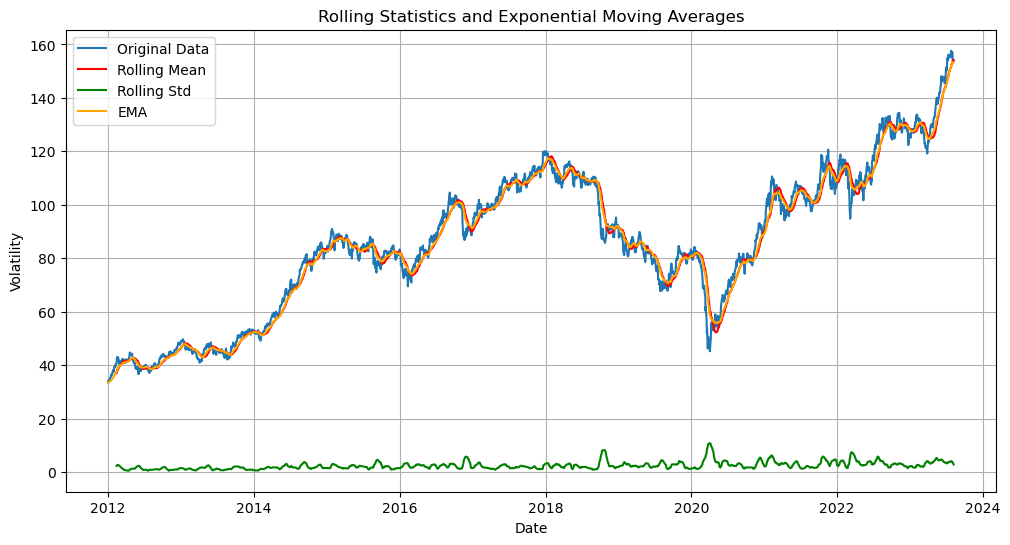

In [14]:
import pandas as pd
import matplotlib.pyplot as plt

# Step 1: Load the Dataset
df = pd.read_excel(r"C:\Users\Vamshi Krishna\Downloads\Rescaled sectoral volatility.xlsx")

# Step 2: Preprocess the Data (if required)
# Handle missing values and any other preprocessing steps

# Step 3: Calculate Rolling Statistics
# Calculate rolling mean and rolling standard deviation
window_size = 30  # Adjust the window size as needed
rolling_mean = df['Auto'].rolling(window=window_size).mean()
rolling_std = df['Auto'].rolling(window=window_size).std()

# Step 4: Calculate Exponential Moving Averages (EMA)
# Calculate EMA with a span of 30 days
ema = df['Auto'].ewm(span=window_size, adjust=False).mean()

# Step 5: Visualize the Data
plt.figure(figsize=(12, 6))
plt.plot(df['Date'], df['Auto'], label='Original Data')
plt.plot(df['Date'], rolling_mean, label='Rolling Mean', color='red')
plt.plot(df['Date'], rolling_std, label='Rolling Std', color='green')
plt.plot(df['Date'], ema, label='EMA', color='orange')
plt.xlabel('Date')
plt.ylabel('Volatility')
plt.title('Rolling Statistics and Exponential Moving Averages')
plt.legend()
plt.grid(True)
plt.show()


In [16]:
pip install hmmlearn


Defaulting to user installation because normal site-packages is not writeable
     -------------------------------------- 124.5/124.5 kB 1.0 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


C:\ProgramData\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\ProgramData\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=12.
  warnings.warn(


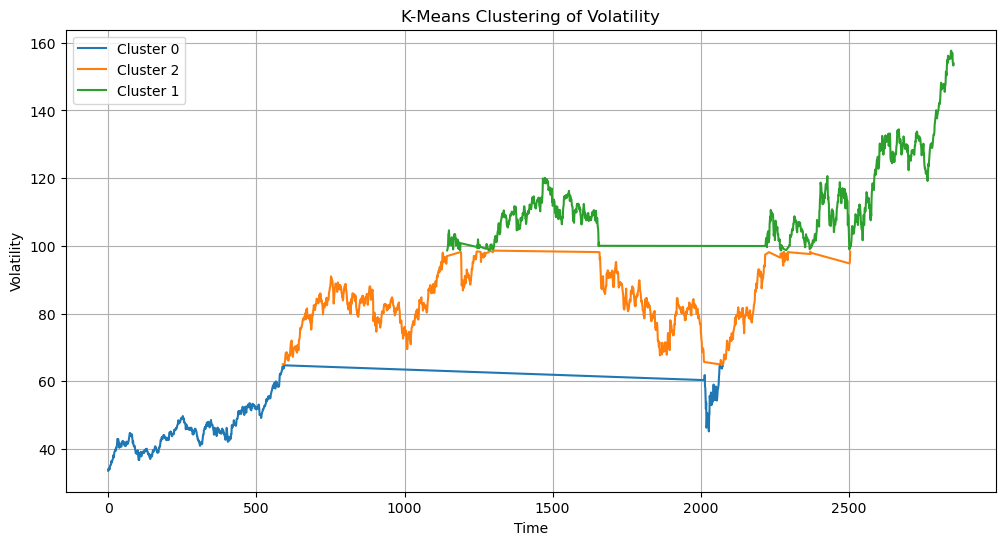

C:\ProgramData\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=12.
  warnings.warn(


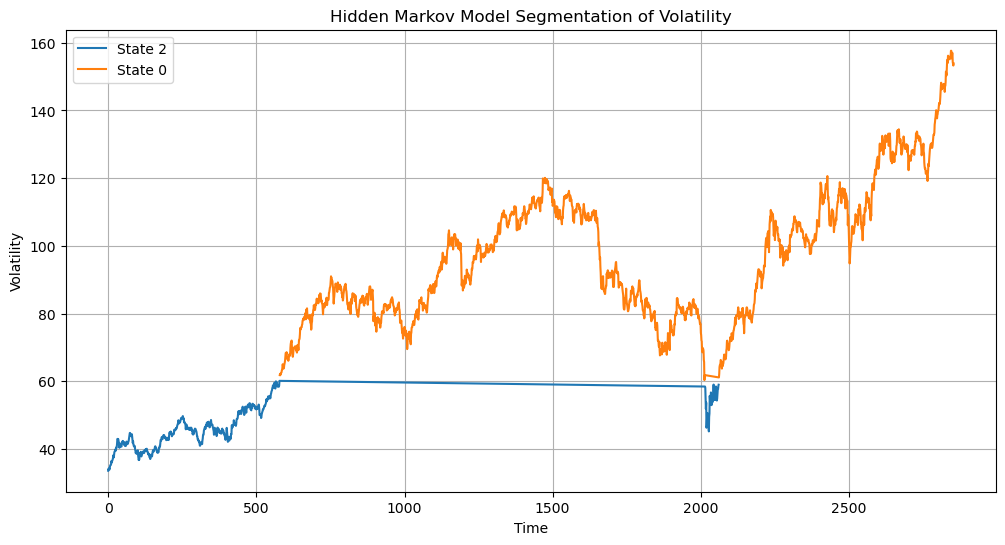

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from hmmlearn import hmm

# Step 1: Load the Dataset
df = pd.read_excel(r"C:\Users\Vamshi Krishna\Downloads\Rescaled sectoral volatility.xlsx")

# Step 2: Preprocess the Data (if required)
# Handle missing values and any other preprocessing steps

# Step 3: Select Features
X = df[['Auto']].values  # Selecting the 'Auto' column as the feature for clustering

# Step 4: Apply K-Means Clustering
kmeans = KMeans(n_clusters=3, random_state=42)
df['Cluster'] = kmeans.fit_predict(X)

# Step 5: Visualize Clusters
plt.figure(figsize=(12, 6))
for cluster in df['Cluster'].unique():
    plt.plot(df[df['Cluster'] == cluster].index, df[df['Cluster'] == cluster]['Auto'], label=f'Cluster {cluster}')
plt.xlabel('Time')
plt.ylabel('Volatility')
plt.title('K-Means Clustering of Volatility')
plt.legend()
plt.grid(True)
plt.show()

# Step 6: Apply Hidden Markov Models (HMM)
model = hmm.GaussianHMM(n_components=3, covariance_type="full", n_iter=100)
model.fit(X)
hidden_states = model.predict(X)
df['Hidden_State'] = hidden_states

# Step 7: Visualize Hidden States
plt.figure(figsize=(12, 6))
for state in df['Hidden_State'].unique():
    plt.plot(df[df['Hidden_State'] == state].index, df[df['Hidden_State'] == state]['Auto'], label=f'State {state}')
plt.xlabel('Time')
plt.ylabel('Volatility')
plt.title('Hidden Markov Model Segmentation of Volatility')
plt.legend()
plt.grid(True)
plt.show()
